# Importing all Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Ingestion

In [2]:
df=pd.read_csv(r'C:\Users\PS4Z\Downloads\archive\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#seeing how the data looks like
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Understanding Data

In [4]:
#shape of data
print('Data shape:',df.shape)

Data shape: (7043, 21)


In [5]:
#finding null values in data
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Observations:No Null values

In [6]:
#Getting information about data; null counts and data types of data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#list of column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#getting data types of each column header
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#checking for duplicate values
df.duplicated().sum()

0

Observations:No duplicate Values

# Understanding Imbalanced Data

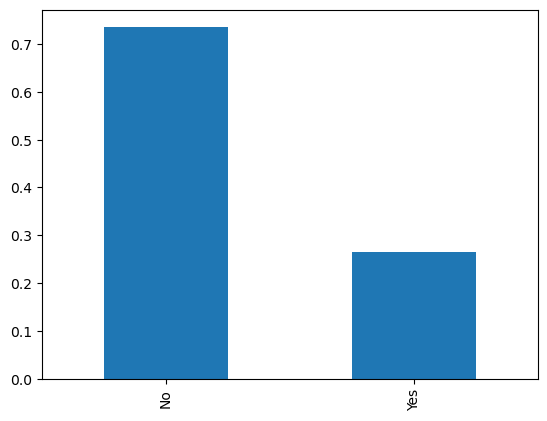

In [10]:
#Plotting Bar Plot for target variable
df['Churn'].value_counts(normalize=True).plot(kind='bar');

Observation:we can see above data is imbalanced, more class belongs to no than yes

In [11]:
#getting a sample from data
df.sample(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
236,0621-JFHOL,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Two year,Yes,Mailed check,29.60,299.05,No
4714,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9,No
6471,0859-YGKFW,Male,0,Yes,Yes,18,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.05,345.9,No
375,7156-MXBJE,Female,0,No,No,43,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),85.10,3662.25,No
4908,3957-LXOLK,Female,1,No,No,28,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.15,3152.5,Yes
1270,8780-IHCRN,Male,0,Yes,Yes,63,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.65,1574.5,No
3205,3810-DVDQQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),117.60,8308.9,No


In [12]:
#Getting 5 point summary for all numercial features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Visualizing the Data

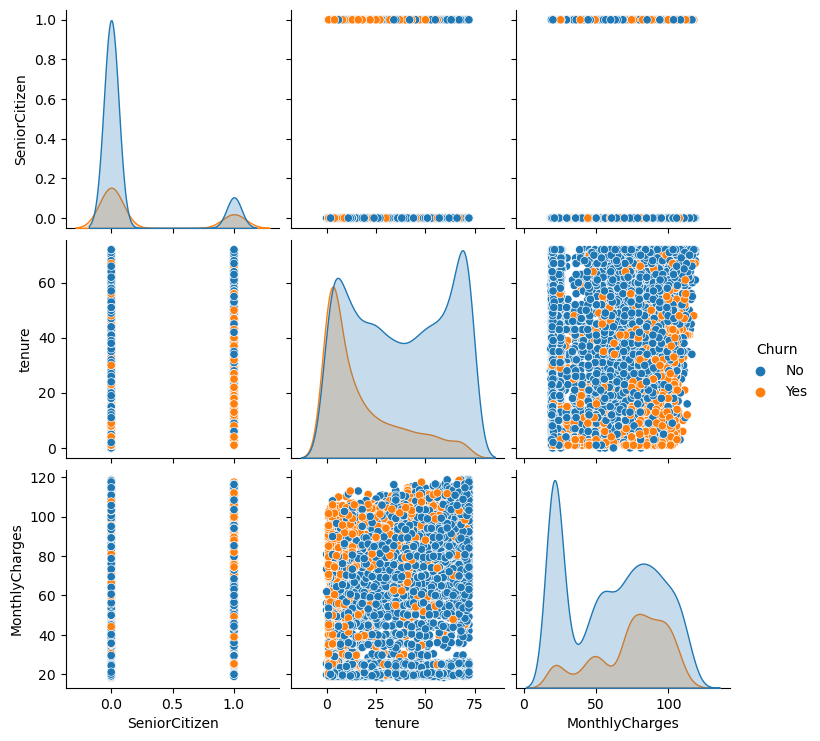

In [13]:
#pairplot shows graphical representation of all numerical features with one another with target variable in legend
sns.pairplot(data=df,hue='Churn');

In [14]:
feat_df=df[['gender','SeniorCitizen','Partner','Dependents']]
feat=feat_df.columns
feat

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

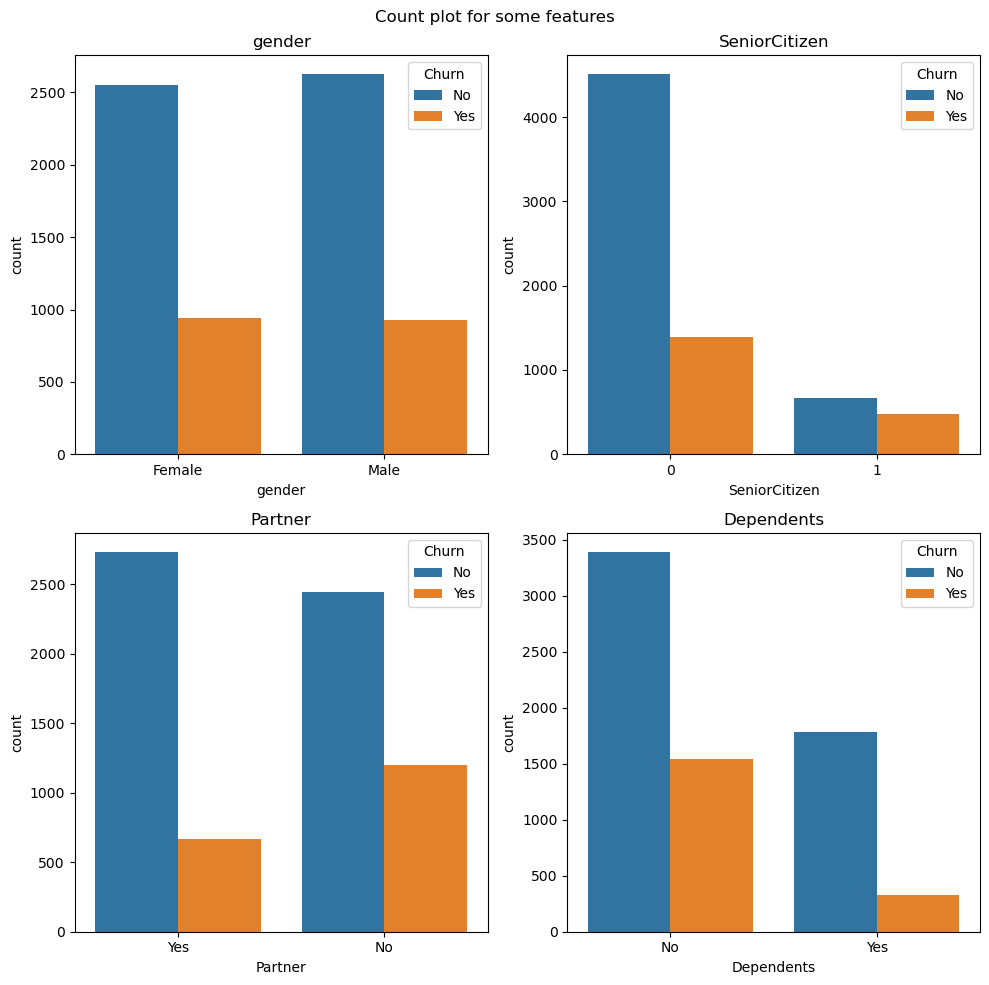

In [15]:
#plotting features based on Target variable as hue to draw observations
plt.figure(figsize=(10,10))
plt.suptitle('Count plot for some features')
for a in range(0,len(feat)):
    plt.subplot(2,2,a+1)
    sns.countplot(df[feat[a]],hue=df['Churn'])
    plt.title(label=feat[a])
    plt.tight_layout();

Observations:

1. No significant relation between Churn and gender

2. One who is not Senior Citizen is more likely to be churned than a Senior Citizen

3. One who don't have Partners got most churned.

4. One who doesn't have dependents got most churned

<Figure size 1000x1000 with 0 Axes>

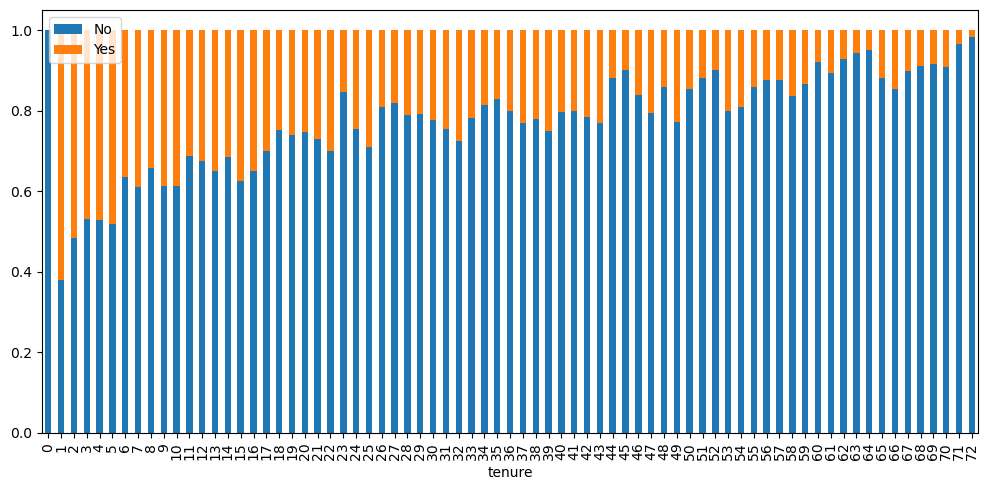

In [16]:
#plotting features based on Target variable as hue to draw observations
plt.figure(figsize=(10,10))
exp=pd.crosstab(df['tenure'],df['Churn']) 
exp.div(exp.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(10,5))
plt.legend(loc=0)
plt.tight_layout();

Observations:new customers have a maximum churning rate, we can convert these months into years so it would be easy to target the new customers.

In [17]:
feat1_df=df[['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
             'StreamingMovies','Contract']]
feat1=feat1_df.columns
feat1

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract'],
      dtype='object')

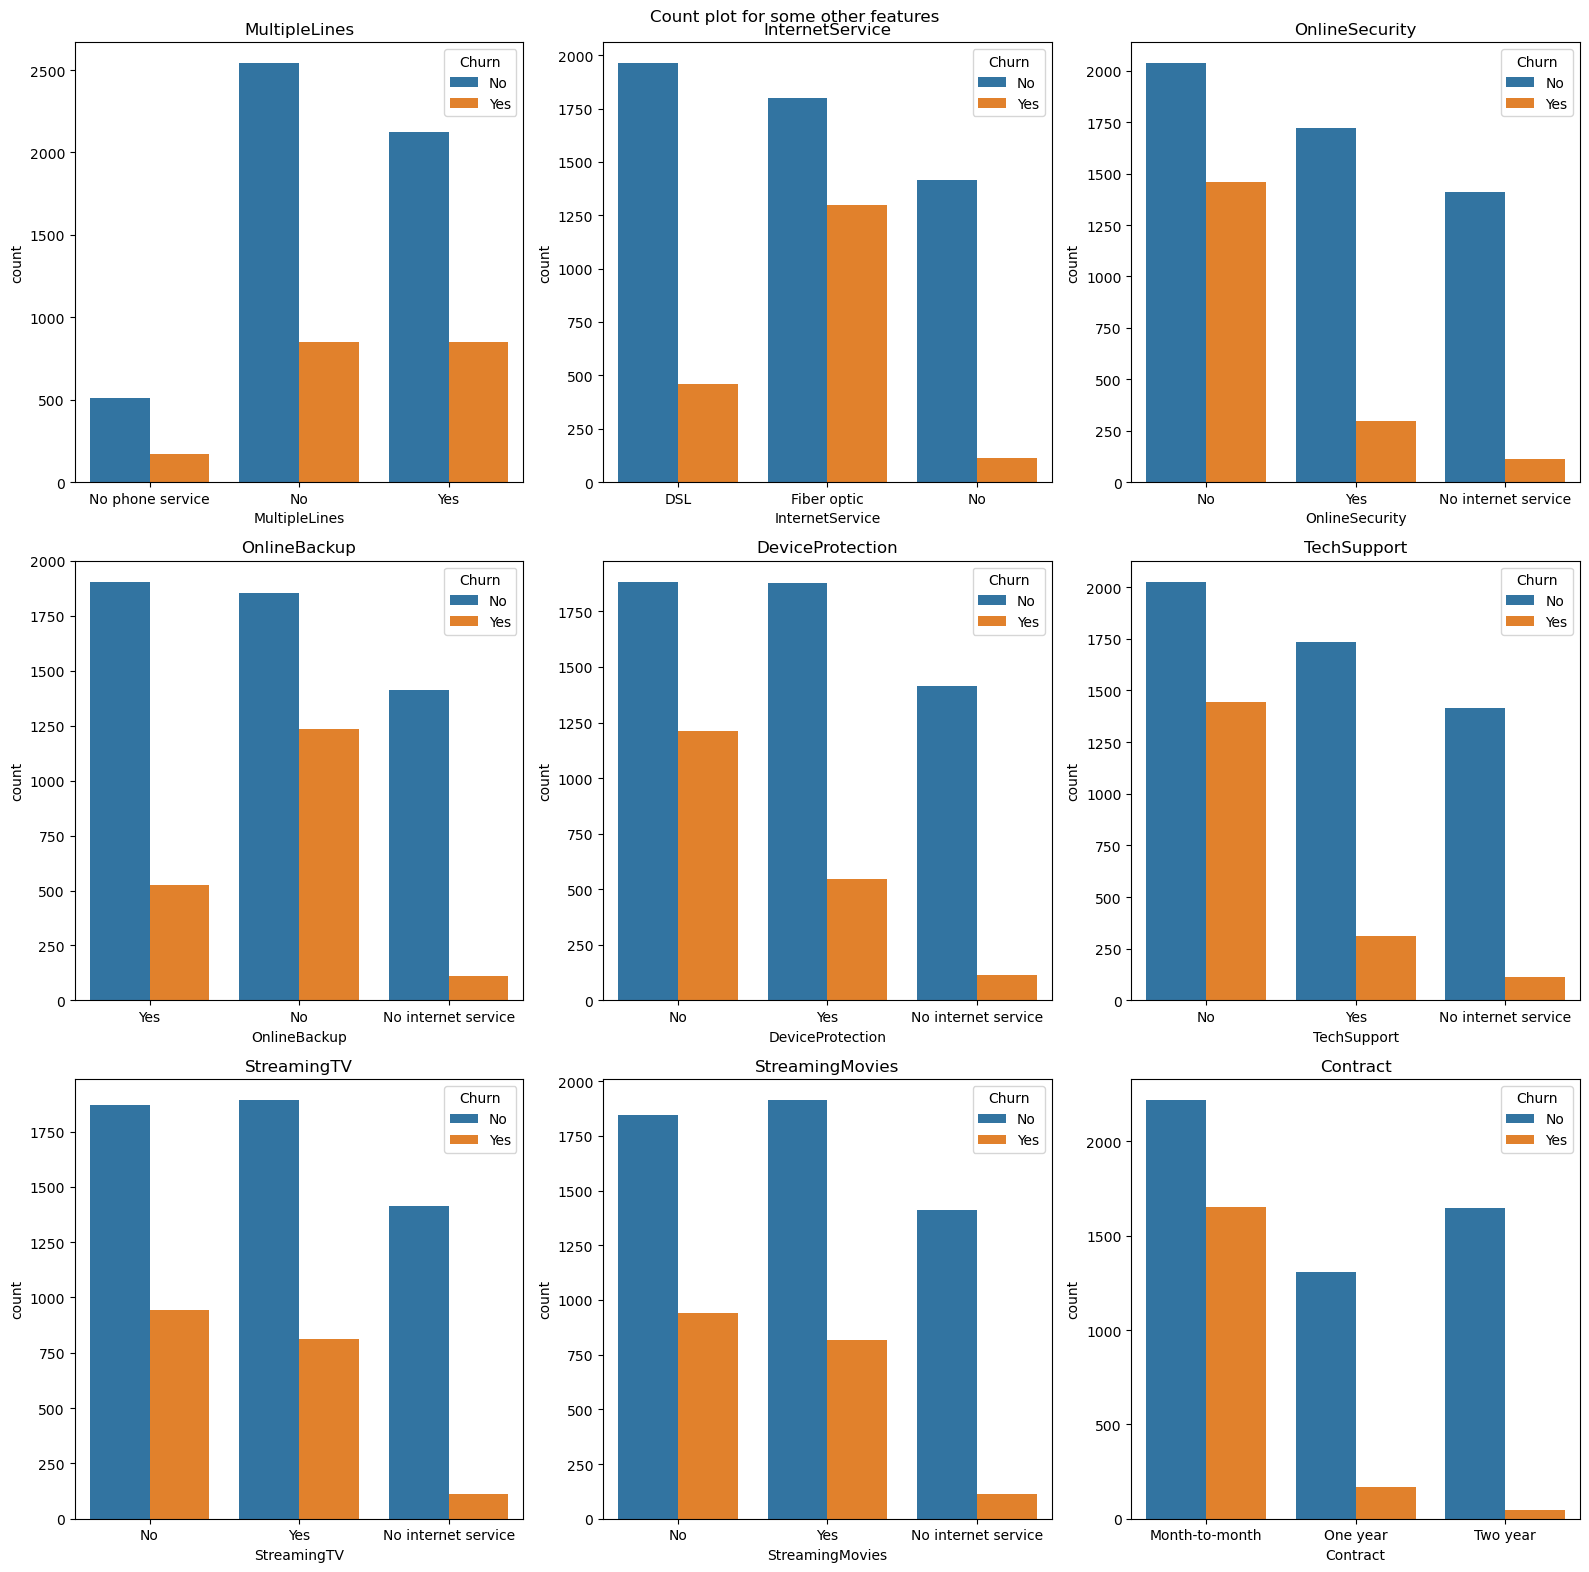

In [18]:
#plotting features based on Target variable as hue to draw observations
plt.figure(figsize=(16,16))
plt.suptitle('Count plot for some other features')
for a in range(0,len(feat1)):
    plt.subplot(3,3,a+1)
    sns.countplot(df[feat1[a]],hue=df['Churn'])
    plt.title(label=feat1[a])
    plt.tight_layout();

Observations:

1. Those who has taken fiber optic internet service more likely to be churn.

2. We know the consequences of Cyber vulnerability, so it's obvious that customer will trust us if we will give them full security.

3. The customers who are not getting online backup services are more likely to be churned.

4. One who has not got Device protection guarantee are more likely to be churned.

5. One who has no technology support are more likely to be churned.

6. There is no significant change between the churning rate of with StreamingTV and without StreamingTV services, but at some point one who has not this service are more likely to be churned.

7. There is no significant change between the churning rate of with StreamingMovies and without StreamingMovies services. but at some point one who has not this service are more likely to be churned.

8. We have to focus on the retaintion of Month-Month Customers by providing them good quality services.

9. No significant change between churning rate of Customes having multiple line services or not, also no significance without phone services as well.

In [19]:
feat2_df=df[['PhoneService','PaperlessBilling']]
feat2=feat2_df.columns
feat2

Index(['PhoneService', 'PaperlessBilling'], dtype='object')

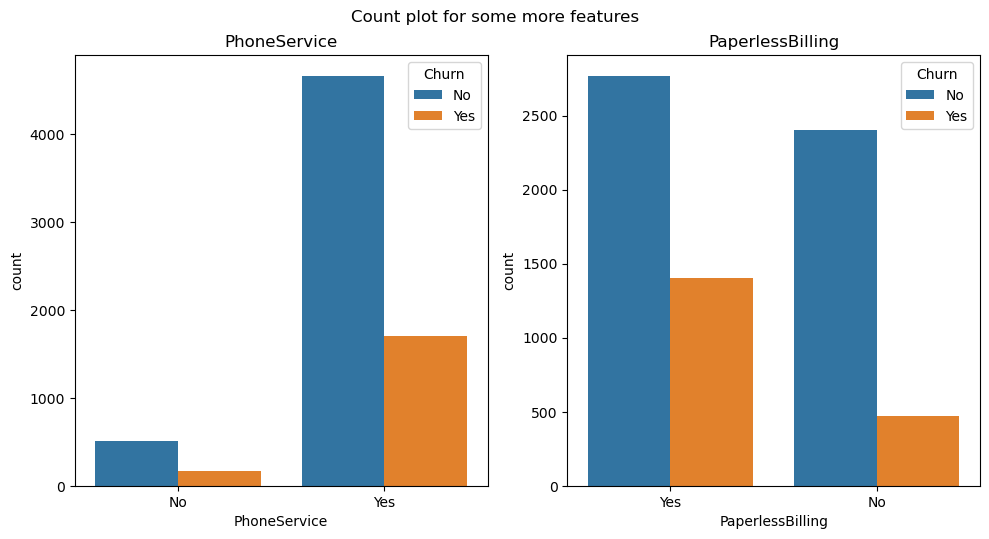

In [20]:
#plotting features based on Target variable as hue to draw observations
plt.figure(figsize=(10,10))
plt.suptitle('Count plot for some more features')
for a in range(0,len(feat2)):
    plt.subplot(2,2,a+1)
    sns.countplot(df[feat2[a]],hue=df['Churn'])
    plt.title(label=feat2[a])
    plt.tight_layout();

Observations:

1. One who has Phone Services are more likely to be churned than those who do not.

2. One who has PaperlessBilling are more likely to be chured than those who do not.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

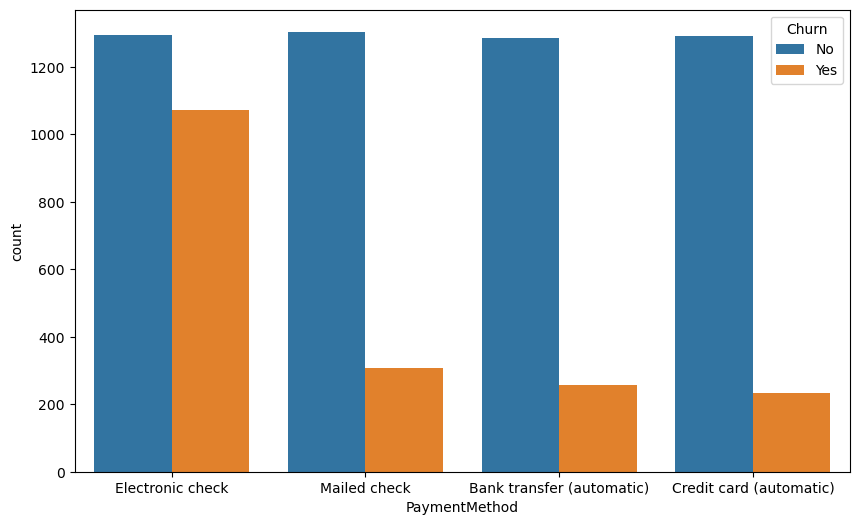

In [21]:
#for feature PaymentMethod
plt.figure(figsize=(10,6))
sns.countplot(df['PaymentMethod'],hue=df['Churn'])

Observation:Most of customers who has chosen Electronic payment method more likely to be churned.

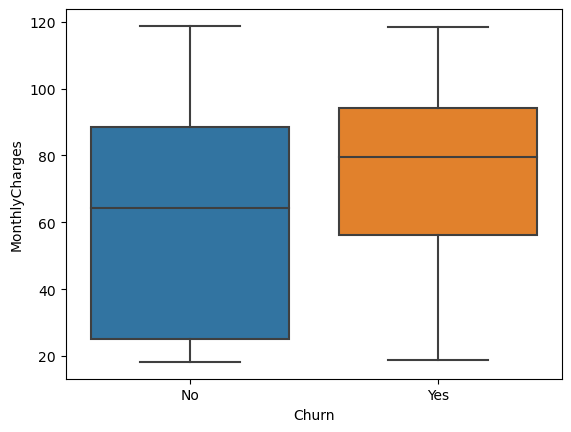

In [22]:
#plotting feature MonthlyCharges
sns.boxplot(y=df['MonthlyCharges'],x=df['Churn']);

Observations:one who paying more are likely to be churned.

In [23]:
#Changing data type to float and replacing blank values to 0 in feature TotalCharges
df['TotalCharges']=df['TotalCharges'].replace(' ',0)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],downcast="float")

In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


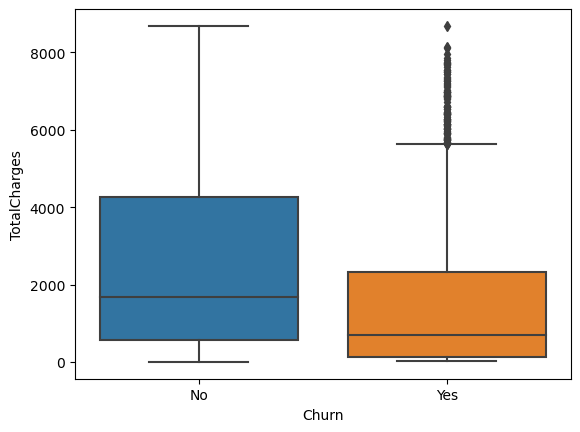

In [25]:
sns.boxplot(y=df['TotalCharges'],x=df['Churn']);

Observations:The outliers present in the total charges With respect to churn rate. Will take care of it in next step.

# Feature Engineering

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [27]:
# Convert all the categorical features into numerical

# define class

encode=LabelEncoder()

df['gender']=encode.fit_transform(df['gender'])
df['Partner']=encode.fit_transform(df['Partner'])
df['Dependents']=encode.fit_transform(df['Dependents'])
df['PhoneService']=encode.fit_transform(df['PhoneService'])
df['MultipleLines']=encode.fit_transform(df['MultipleLines'])
df['InternetService']=encode.fit_transform(df['InternetService'])
df['OnlineSecurity']=encode.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=encode.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=encode.fit_transform(df['DeviceProtection'])
df['TechSupport']=encode.fit_transform(df['TechSupport'])
df['StreamingTV']=encode.fit_transform(df['StreamingTV'])
df['StreamingMovies']=encode.fit_transform(df['StreamingMovies'])
df['Contract']=encode.fit_transform(df['Contract'])
df['PaperlessBilling']=encode.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=encode.fit_transform(df['PaymentMethod'])
df['Churn']=encode.fit_transform(df['Churn'])

In [28]:
# Convert tenure feature into 3 category (we have taken 2 year difference according to the previous Analysis.)
# 0-24 Months-->1, 25-48 Months--->2 and else is 3

df['tenure']=df['tenure'].map(lambda x: 1 if x<=24 else 2 if x<=48 else 3)

In [29]:
#define class

scale=StandardScaler()

df['MonthlyCharges']=scale.fit_transform(df['MonthlyCharges'].values.reshape(-1,1))
df['TotalCharges']=scale.fit_transform(df['TotalCharges'].values.reshape(-1,1))

# Handling Outliers

In [30]:
# df.groupby('Churn')['TotalCharges'].mean()
mean_=df.groupby('Churn')['TotalCharges'].mean()
mean_

Churn
0    0.119198
1   -0.329978
Name: TotalCharges, dtype: float32

In [31]:
mean=1531.796143
df1=df[(df['Churn']=='Yes')&(df['TotalCharges']>=mean)]['TotalCharges'].map(lambda x: mean if x>mean else x)
df['TotalCharges'].update(df1)

# Checking for Multicollinearity

In [32]:
#checking correlation between all numerical features in the dataset
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.006577,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.018821,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.348668,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.141257,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221
tenure,0.006577,0.018821,0.348668,0.141257,1.000000,0.004960,0.316073,-0.031103,0.294287,0.348974,0.339041,0.297290,0.268137,0.276032,0.626061,0.005004,-0.343300,0.233516,0.789548,-0.318469
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.004960,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.316073,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.031103,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.294287,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.348974,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.374410,-0.195525


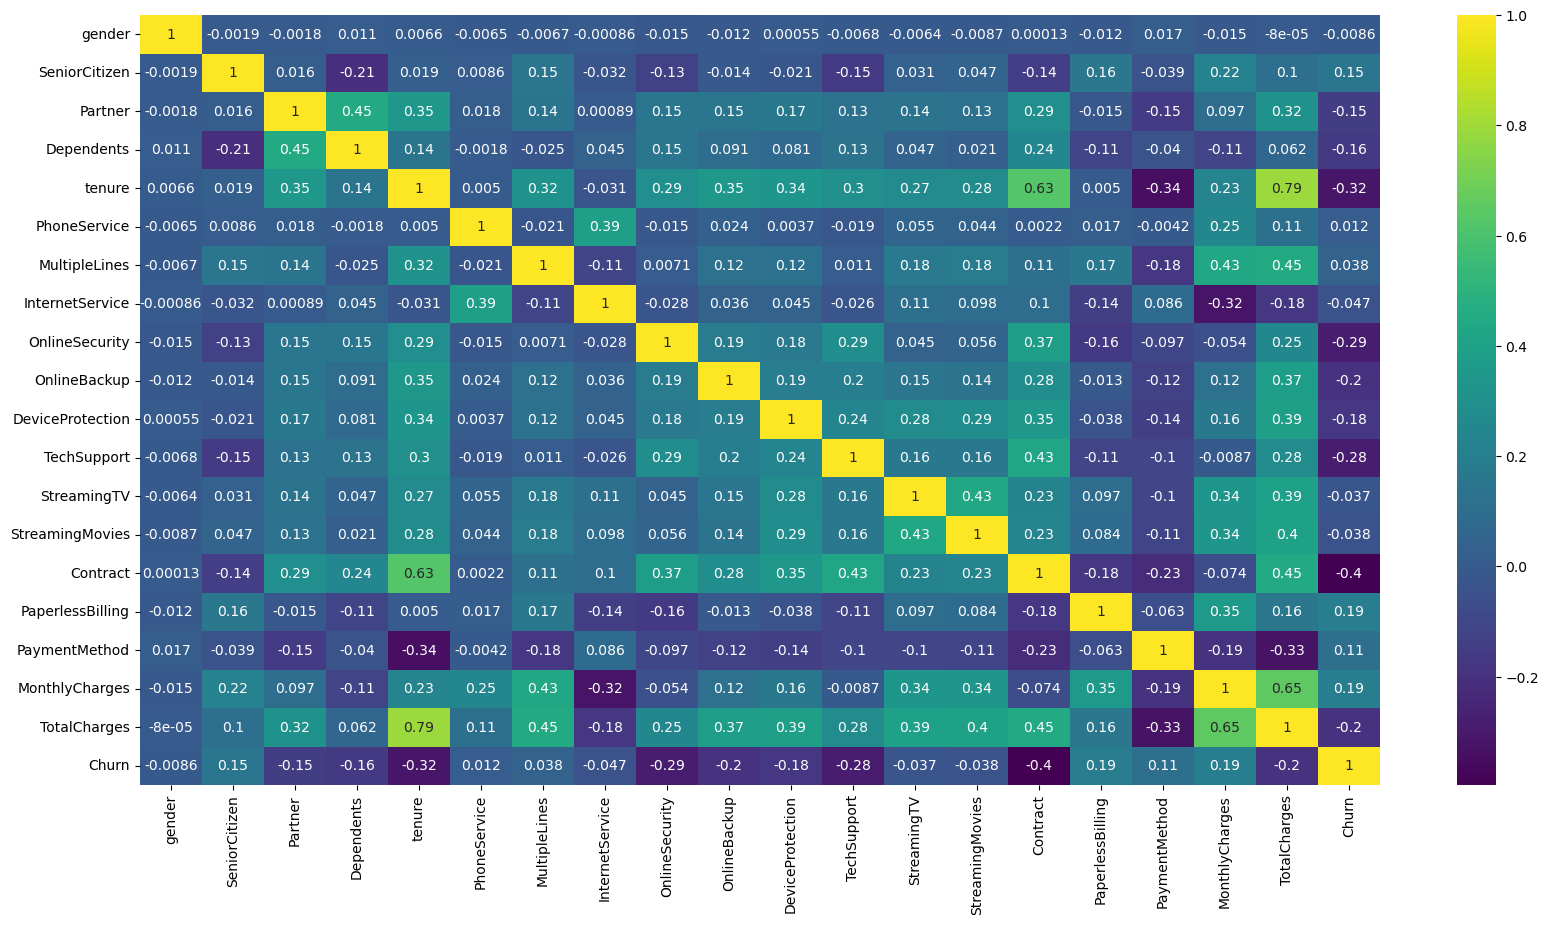

In [33]:
#plotting correlation into heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),cmap='viridis',annot=True);

Observations:Tenure is highly correlated with Contract and TotalCharges features. We have to delete this feature to avoid multicollinearity problem.

# Separating target variable(Dependent) from Independent variables

In [34]:
x=df.drop(['customerID','Churn','tenure'],axis=1)
y=df['Churn']

In [35]:
# We have Imbalanced Data and we have to do sampling to avoid this problem
# we have two method so for 1] Under Sampling, 2] Oversampling
# We will go for Oversampling.

from imblearn.over_sampling import RandomOverSampler
ros =RandomOverSampler()
x_sample,y_sample=ros.fit_resample(x, y)

# Train_Test_Split

In [36]:
# Model Selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,test_size=0.2,random_state=101)

In [37]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3773,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,-1.314870,-0.994662
6666,0,1,1,0,1,2,0,0,2,2,2,2,2,0,0,2,0.634418,0.013441
682,1,0,0,0,1,0,0,2,0,0,2,2,0,0,1,1,-0.012021,-0.919462
6333,0,1,0,0,1,2,1,0,0,2,2,2,2,1,1,2,1.370594,1.836056
4027,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,2,-1.339797,-0.792777


In [38]:
#getting shape of training data
x_train.shape,y_train.shape

((8278, 18), (8278,))

In [39]:
#getting shape of testing data
x_test.shape,y_test.shape

((2070, 18), (2070,))

# Logistic Regression Model

In [40]:
#fitting the model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [41]:
#prediction
pred=lr.predict(x_test)

# Perforance Metrics

In [42]:
#performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [43]:
print('MSE:',mean_squared_error(y_test,pred))
print('MAE:',mean_absolute_error(y_test,pred))

MSE: 0.23478260869565218
MAE: 0.23478260869565218


# Random Forest Model

In [44]:
#fitting the model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
#prediction
pred1=rf.predict(x_test)

# Model Evaluation

In [46]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
report1=classification_report(y_test,pred1)
matrix1=confusion_matrix(y_test,pred1)

In [47]:
report1=classification_report(y_test,pred1)
matrix1=confusion_matrix(y_test,pred1)

In [48]:
print('Classification Report:\n',report1)
print('Confusion Matrix :\n',matrix1)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88      1052
           1       0.85      0.94      0.89      1018

    accuracy                           0.89      2070
   macro avg       0.89      0.89      0.89      2070
weighted avg       0.89      0.89      0.89      2070

Confusion Matrix :
 [[878 174]
 [ 60 958]]


# Hyperpatameter Tuning

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
params={'n_estimators':[i for i in  range(100,2000,200)],
      'max_depth':[1,2,4,5,10,15,20,30,35,40],
       'min_samples_split':[1,2,4,5,10,15,20],
       'min_samples_leaf':[1,2,6,8,10,15,20,25,30]}

clf=RandomForestClassifier()

model=RandomizedSearchCV(clf,param_distributions=params,cv=3)

model.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 2, 4, 5, 10, 15, 20,
                                                      30, 35, 40],
                                        'min_samples_leaf': [1, 2, 6, 8, 10, 15,
                                                             20, 25, 30],
                                        'min_samples_split': [1, 2, 4, 5, 10,
                                                              15, 20],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900, 1100, 1300, 1500,
                                                         1700, 1900]})

In [51]:
model.best_score_

0.796205960991958

Observations:We can see hyperparameter-tuning is not improving the accuracy, still we got the good accuracy.

We got almost 90% F1-Score without Hyperparameter-Tuning.

In [52]:
features=pd.DataFrame({'Important_features':rf.feature_importances_},index=x.columns)

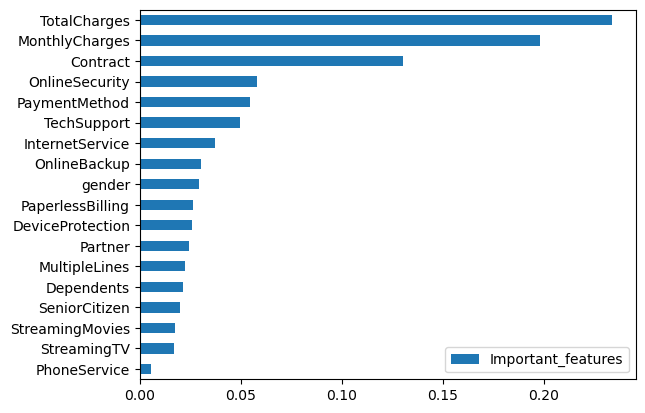

In [53]:
features.sort_values(by='Important_features',ascending=True).plot(kind='barh');

In [54]:
import pickle
filename='churn_rfc.pkl'
pickle.dump(rf,open(filename,'wb'))

In [55]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.958066
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.193672
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938874


In [56]:
X=[[0,0,0,0,1,2,1,0,0,2,0,2,2,0,1,0,70.8,60.8]]

rf.predict(X)

array([0])

In [57]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,-1.160323,-0.992611,0
1,5575-GNVDE,1,0,0,0,2,1,0,0,2,...,2,0,0,0,1,0,3,-0.259629,-0.172165,0
2,3668-QPYBK,1,0,0,0,1,1,0,0,2,...,0,0,0,0,0,1,3,-0.362660,-0.958066,1
3,7795-CFOCW,1,0,0,0,2,0,1,0,2,...,2,2,0,0,1,0,0,-0.746535,-0.193672,0
4,9237-HQITU,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,-0.938874,1


In [58]:
pred1

array([0, 0, 0, ..., 1, 1, 1])

In [59]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
800,0,1,1,0,1,2,1,0,0,0,0,0,0,2,1,1,0.361883,1.381637
4215,1,0,1,0,1,2,1,0,2,2,2,2,2,2,1,2,1.443713,2.453359
41,0,0,1,1,1,2,0,2,2,0,0,2,0,2,1,1,0.147511,1.143818
5461,0,0,0,0,1,0,0,2,0,0,2,0,2,2,1,3,0.011244,0.691341
9375,1,0,0,0,1,0,1,0,0,0,0,2,0,0,1,2,0.514768,-0.942007
